Open file


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('fullfact_health.csv')
df.head(10)

,timestamp,title,excerpt
0,11 December 2025,How should we discuss risk vs benefit in the c...,Guest comment piece from Professor Dame Sarah ...
1,5 December 2025,Revealed: how academics are being deepfaked on...,Strange videos of a professor offering cures f...
2,5 December 2025,Are one in six Scots waiting for NHS care?,Scottish Labour claims one in six Scots are wa...
3,21 November 2025,The government is not going to track people’s ...,A series of social media videos falsely claim ...
4,19 November 2025,"No, you don’t need to buy a ‘£100 access card’...",Posts falsely claim the government is introduc...
5,7 November 2025,Covid-19 vaccines do not contain ‘cancer-causi...,"A video shared over 9,000 times on Facebook ma..."
6,30 October 2025,Official child obesity figures include tens of...,Ministers and the NHS have repeatedly said one...
7,29 October 2025,Amish people do vaccinate - and autism exists ...,Social media claims that autism is less preval...
8,17 October 2025,Coughing hard won’t save you from a heart atta...,Incorrect social media posts claiming coughing...
9,17 October 2025,The government isn’t introducing a £10 charge ...,Videos circulating on social media claim that ...


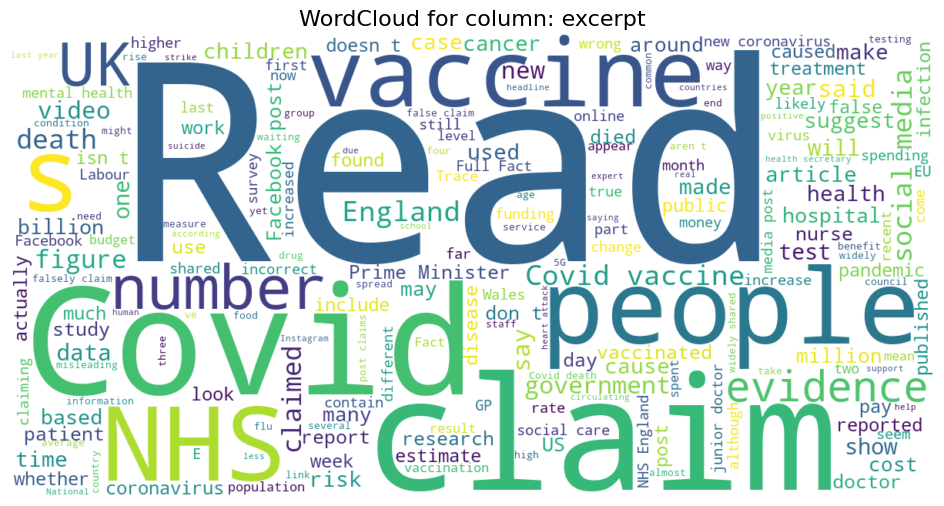

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- 1. Đọc file CSV ---
df = pd.read_csv("fullfact_health.csv")   # đổi tên file nếu cần

# --- 2. Nhập tên cột muốn tạo WordCloud ---
column_name = "excerpt"   # đổi thành tên cột của bạn

# --- 3. Gộp toàn bộ text trong cột ---
text = " ".join(df[column_name].dropna().astype(str))

# --- 4. Tạo WordCloud ---
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200
).generate(text)

# --- 5. Hiển thị ---
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for column: {column_name}", fontsize=16)
plt.show()


0    2025
1    2025
2    2025
3    2025
4    2025
Name: year, dtype: int64
0
year
2012      4
2013      2
2014     15
2015     66
2016     78
2017    102
2018     68
2019     66
2020    381
2021    427
2022    212
2023    172
2024     94
2025     57
Name: count, dtype: int64


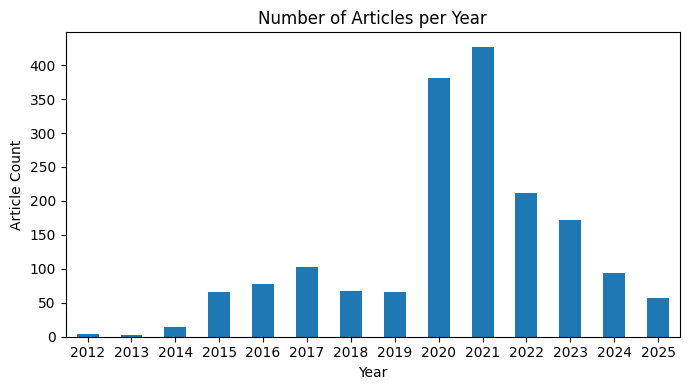

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fullfact_health.csv")

# Clean headers (remove spaces + BOM)
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Extract year
def extract_year(date_str):
    parts = str(date_str).split()
    if len(parts) >= 3:
        return int(parts[-1])   # ALWAYS take last element
    return None

df["year"] = df["timestamp"].apply(extract_year)

print(df["year"].head())        # check
print(df["year"].isna().sum())  # check missing

# Count
year_counts = df["year"].value_counts().sort_index()
print(year_counts)

# Plot
plt.figure(figsize=(7,4))
year_counts.plot(kind="bar")
plt.title("Number of Articles per Year")
plt.xlabel("Year")
plt.ylabel("Article Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
